## CSCI 359. Thursday, February 11th
### Lab 2: Basic Prediction and Classification
### Due, February 17th by 5:00 pm.

You will continue getting more familiar with the `pandas` package, practice loading, reading a dataset, and use data frames from pandas. You will also use the `sklearn` package to see simple examples of classification, use different thresholds for classification, and get practice in computing the true positive and false positive rates. 


To start off create a `lab2` directory in your (local) repo that you created last week. Create a `data` folder in it. Create a new `lab2` Jupyter notebook, and type along all the commands and instructions in it. Alternatively, you may download this notebook and run it locally from your machine.  By next week, make sure you push the completed lab to your gitlab repo to submit this lab. 

In [1]:
import pandas as pd

Pandas has two primary object types:

*DataFrame*: rows and columns ( pretty much like a spreadsheet)

*Series*: a single column

Save the file'Advertising.csv' from [my repo](https://github.com/BucknellFairness/CSCI359-SP21/tree/main/labs/lab2/data) in your `data` folder.

Now read the file into a pandas data frame (consult pandas documentation for this.)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/BucknellFairness/CSCI379-SP20/master/Labs/lab1/data/Advertising.csv', index_col=0)

In [3]:
# What does this do? 
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# How would you view the last four
# rows of this data frame? Write that line of code below. 


In [5]:
# check the shape of the DataFrame (rows, columns)
df.shape

(200, 4)

For our first prediction problem, we're going to predict the Sales (say in 100,000's) as a function of advertising revenue spent on TV, Radio, and Newspaper as shown in the `Advertising.csv` data set.

Q1: What are the features of this prediction problem?  Write your answer below as a Markdown cell. Here's [a basic guide for markdown.](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

What is the target variable? Write your answer below as a Markdown cell.


We will use one more library for data visualization, called **seaborn**.

It should be installed with Anaconda, if it's not, run ** conda install seaborn** from the command line. (It is available in the Google colaboratory.)

In [6]:
import seaborn as sns

The line below allows plots to appear in the notebook.

In [7]:
%matplotlib inline

We'll use a scatter plot to visualize the relationship between the features and the response variable.

Learn more here about the scatter plot https://seaborn.pydata.org/generated/seaborn.pairplot.html

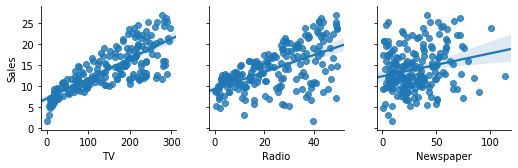

In [8]:
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', kind = 'reg') 

We can look at a subset of the original dataframe.

In [9]:
feature_cols = ['TV', 'Radio', 'Newspaper']

In [10]:
X = df[feature_cols]

In [11]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [12]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [13]:
print(X.shape)

(200, 3)


In [14]:
# the response variable
y = df['Sales']

In [15]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

We'll use the **scikit-learn** python module to do all the heavy lifting for our regression and classification algorithms.

In particular, look at:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [16]:
from sklearn.model_selection import train_test_split

What does the line below achieve? Write your answer in a markdown cell.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

Review linear regression from the reading. Here is [one resource.](http://r-statistics.co/Linear-Regression.html)

In [18]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

What does the `fit` function do? Explain in a text box below.

What do `.intercept_` and `.coef` functions do?

In [19]:
print(linreg.intercept_)

2.8769666223179318


In [20]:
print(linreg.coef_)

[0.04656457 0.17915812 0.00345046]


In [21]:
# What does this line achieve? 
# Write your answer in a markdown cell below.
y_pred = linreg.predict(X_test)

What is one way of comparing **y_pred** to **y_test**? Why should we do it? Refer to the resources on linear regression you read. Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to determine which function you can use to score a linear predictor. Write a line of code that uses that function.

In [22]:
# For example
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

1.0668917082595213


# Onto Classification

Now, we'll go on to learn more about a simple **classification**  technique called logistic regression.



Q: How is classification different from prediction you saw above? Write your answer in a markdown cell below.

We'll use the [Pima Indians Diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) originally from the UCI Machine Learning Repository. If you cloned or downloaded this repo, then the data file is in the *data* folder, and you can place it in an appropriate folder wrt your Jupyter notebook.

Q: Using the link to the Pima Indians Diabetes dataset to find out what the target variable is for the prediction problem considered? What are the class labels? What are the features? Write your answer in a markdown cell below.

In [23]:
path = 'data/diabetes.csv'

In [24]:
#reading it into a pandas dataframe
pima = pd.read_csv(path)

In [25]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
# these are the features we will use for our classification

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

In [27]:
# the feature matrix
X = pima[feature_cols]
# the label column
y = pima.Outcome

In [28]:
#view a few
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [29]:
# This line should be familiar from the linear regression section
from sklearn.model_selection import train_test_split

In [30]:
# Once again, create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [31]:
# Use Logistic Regression this time
from sklearn.linear_model import LogisticRegression

Learn more about Logistic Regression. 
#### What is Logistic Regression?

#### **Linear regression:** continuous response is modeled as a linear combination of the features:
 
 $$y = \beta_0 + \beta_1x$$
 
#### **Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:
 
 $$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.
 
Probability is sometimes written as $\pi$:
 
 $$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

 The equation can be rearranged into the **logistic function**:
 
 $$\pi = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

 In other words:

 - Logistic regression outputs the **probabilities of a specific class**
 - Those probabilities can be converted into **class predictions**

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/djm056/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# Q: Consult the documentation to find out what this line below achieves? Write you answer in a markdown cell below. 
y_pred_prob = logreg.predict_proba(X_test)



Q: Visit the documentation for `logreg.predict` to determine what the classification threshold is. Write your answer below.



In [34]:
y_pred_class = logreg.predict(X_test)

Now, we'll use a host of evaluation metrics, to evaluate how good the classification is. Learn about the accuracy and confusion matrix [here.](https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234)

In [35]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


Write code below to print the first 25 true and predicted responses.

Make sure you understand what the confusion matrix is before you proceed.

In [36]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


In [37]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

Q: Learn more about the True Positive Rate and the False Positive Rate of a classifier from [this resource].(https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234) Define them in your own words in a text box below.

Compute the True Positive Rate and the False Positive Rate of this classifier?

In [38]:
TPR = TP/(TP + FN )

In [39]:
print(TPR)

0.24193548387096775


In [40]:
# Can also be computed by
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775


In [41]:
FPR =(FP / float(TN + FP))

In [42]:
print(FPR)

0.09230769230769231


## Adjust the classification threshold

Make sure you understand what's happening with the code below.

In [43]:
# print the first 10 predicted responses of inputs in the test set
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [44]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [45]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [46]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [47]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

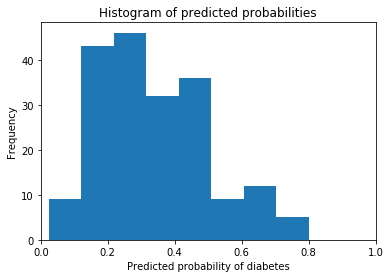

In [48]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Let us decrease the threshold to 0.3, and see how it impacts the FPR and TPR.

In [49]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [50]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [51]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [52]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[118  12]
 [ 47  15]]


In [53]:
# new confusion matrix (threshold of 0.3)
new_confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(new_confusion)

[[80 50]
 [16 46]]


In [54]:
new_TP = new_confusion[1, 1]
new_TN = new_confusion[0, 0]
new_FP = new_confusion[0, 1]
new_FN = new_confusion[1, 0]

Q: Compute the new TPR and FPR.

Q: Repeat the process above with a threshold probability of 0.4. 

Q: Which of these thresholds is "better"? Why?